In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('../artifacts/sentiment_analysis.csv')

In [3]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [4]:
data.shape

(7920, 3)

In [5]:
data.duplicated().sum()

np.int64(0)

In [6]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [7]:
### Text Preprocessing

In [8]:
import re
import string

In [9]:
#convert uppercase to lower case

In [10]:
data["tweet"].head(5)

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

In [11]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))


In [12]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

In [13]:
#Remove links

In [14]:

data["tweet"] = data['tweet'].apply(lambda x: " ".join(re.sub(r'https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))


In [15]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

In [16]:
#remove punctuations

In [17]:


def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')  # Directly remove punctuation without adding space
    return text

data["tweet"] = data["tweet"].apply(remove_punctuations)


In [18]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

In [19]:
data["tweet"] = data["tweet"].str.replace(r'\d+', '', regex=True)



In [20]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

remove stopwords

In [21]:
!pip install nltk

In [22]:
import nltk

In [23]:
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
 sw=file.read().splitlines()

In [25]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [26]:
data["tweet"]= data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [27]:
data["tweet"].head()

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

Stemming

In [28]:
from nltk.stem import PorterStemmer
ps= PorterStemmer()

In [29]:
data["tweet"]= data["tweet"].apply(lambda x: " ".join(ps.stem(x)for x in x.split()))

In [30]:
data["tweet"].head()

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [31]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


In [32]:
#building collection 

In [33]:
from collections import Counter
vocab =Counter()

In [34]:
vocab.update(['java','python','c++'])

In [35]:
vocab

Counter({'java': 1, 'python': 1, 'c++': 1})

In [36]:
for sentence in data['tweet']:
   vocab.update(sentence.split())

In [37]:
vocab

Counter({'iphon': 4073,
         'appl': 2876,
         'samsung': 1395,
         'new': 1137,
         'phone': 1015,
         'follow': 885,
         'soni': 819,
         '…': 756,
         'ipad': 537,
         'rt': 525,
         'love': 499,
         'like': 456,
         'day': 426,
         'app': 416,
         'life': 415,
         'android': 414,
         'photo': 394,
         'get': 383,
         'io': 383,
         'galaxi': 361,
         'instagram': 358,
         'case': 348,
         'beauti': 322,
         'cute': 322,
         'gain': 311,
         'today': 309,
         'work': 306,
         'im': 294,
         'back': 294,
         'fuck': 293,
         'happi': 293,
         'photographi': 292,
         'game': 283,
         'got': 280,
         'fun': 277,
         'news': 265,
         'music': 264,
         'thank': 263,
         'time': 248,
         'make': 247,
         'updat': 236,
         'smile': 231,
         'instagood': 226,
         'funni': 223,
   

In [38]:
len(vocab)

15906

In [39]:
data.shape

(7920, 3)

In [40]:
tokens=[key for key in vocab if vocab[key]>10]

In [41]:
len(tokens)

1146

In [42]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()
    
save_vocabulary(tokens, '../static/model/vocabulary.txt')

###Divide dataset

In [43]:
X = data['tweet']
y = data['label']


In [44]:
X

0       fingerprint pregnanc test android app beauti c...
1       final transpar silicon case thank uncl yay son...
2       love would go talk makememori unplug relax iph...
3       im wire know im georg made way iphon cute dave...
4       amaz servic appl wont even talk question unles...
                              ...                        
7915    live loud lol liveoutloud selfi smile soni mus...
7916    would like wish amaz day make everi minut coun...
7917    help love year old neighbor ipad morn made rea...
7918    final got smart pocket wifi stay connect anyti...
7919    appl barcelona appl store bcn barcelona travel...
Name: tweet, Length: 7920, dtype: object

In [45]:
y

0       0
1       0
2       0
3       0
4       1
       ..
7915    0
7916    0
7917    0
7918    0
7919    0
Name: label, Length: 7920, dtype: int64

In [46]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [48]:
X_train.shape

(6336,)

In [49]:
X_test.shape

(1584,)

In [50]:
y

0       0
1       0
2       0
3       0
4       1
       ..
7915    0
7916    0
7917    0
7918    0
7919    0
Name: label, Length: 7920, dtype: int64

###Vectorization

In [51]:
def vectorizer(ds, vocabulary):
    vectorized_1st = []

    for sentence in ds:
        sentence_1st = np.zeros(len(vocabulary))

        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                 sentence_1st[i] = 1
                
        vectorized_1st.append(sentence_1st)
        
    vectorized_1st_new = np.asarray(vectorized_1st, dtype=np.float32)

    return vectorized_1st_new
    
    

In [52]:
vectorized_x_train = vectorizer(X_train, tokens)

In [53]:
vectorized_x_train


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [54]:
vectorized_x_test = vectorizer(X_test, tokens)

In [55]:
y_train.value_counts()

label
0    4708
1    1628
Name: count, dtype: int64

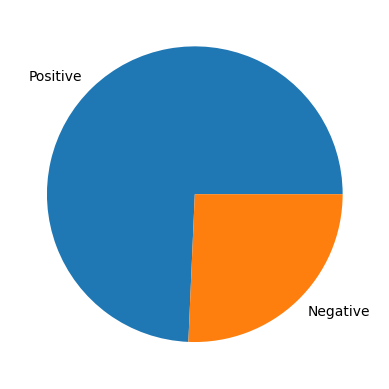

In [56]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

###Handle imbalnced dataset

In [57]:
!pip install imbalanced-learn

In [58]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9416, 1146) (9416,)


In [59]:
y_train_smote.value_counts()

label
0    4708
1    4708
Name: count, dtype: int64

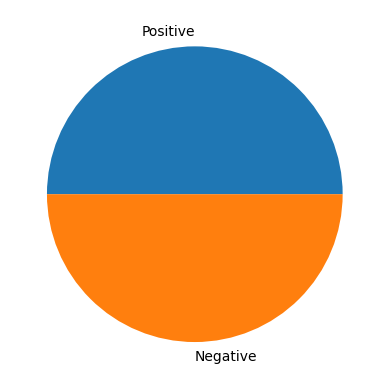

In [60]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [61]:
vectorized_x_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [62]:
y_train_smote

0       0
1       0
2       0
3       0
4       0
       ..
9411    1
9412    1
9413    1
9414    1
9415    1
Name: label, Length: 9416, dtype: int64

In [63]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [64]:
y_test

2111    0
1576    0
2416    0
5859    1
1056    0
       ..
3365    0
3117    1
3917    0
6199    0
7890    1
Name: label, Length: 1584, dtype: int64

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [67]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

Logistic Regression

In [78]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred=lr.predict(vectorized_x_train_smote)
y_test_pred=lr.predict(vectorized_x_test)
training_scores(y_train_smote, y_train_pred)
validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.939
	Precision = 0.916
	Recall = 0.967
	F1-Score = 0.941
Testing Scores:
	Accuracy = 0.883
	Precision = 0.727
	Recall = 0.857
	F1-Score = 0.787
